
## Part 1 - Selection (30 points)

Identify and describe your dataset, its source, and what appeals
to you about it.  Acquire the data and perform an initial exploration
to determine which themes you wish to explore.  Describe the questions
you want to be able to answer with the data, any concerns you have
about the data, and any challenges you expect to have to overcome.



Answer: 
1.Source:
  The dataset is released by the City of LA and be downloaled from Kaggle. 
  
2. Why the dataset is appealing?
   Los Angeles is a charming city with beautiful view, good food, diverse culture and lots of forms of entertainment. People enjoy traveling to the city to feel the sunshine and have some fun. However, it is also a city with crimes happened everyday just like other large city in the U.S. 
   So it is important for travelers to have some safety suggestions. To give good suggestions, we first need some knowledge about the crime structure in LA. And we find this data which is kind of clean and have enough variables for us to do a comprehensive analysis.  
   
3. Basic Description:
This dataset also recorded 275068 of crime reports in LA,CA from 2010-2017. Every record has specific information about the crime with 26 variables. 
  

3.According to the variables in the dataset, we are curious about several quesitons. These questions can be seperated into two types. 
    a. The Frequency Of The Crime. For example, which 5 kinds of crime happen most frequently? Which area is the most dangerous area in LA?  What time should people be more careful about possible happening crime? Which gender and age are more possible to be attacked?
    b.The Relationship Between The Variables.. For example, what kinds of crime happen more frequently to Male or Female? For the top5 danagerous areas and day or night, what kinds of crime happen more and what weapon are used more? 

   To answer these question, we would like to do the Crime Frequency analysis from four factors which are Crime Timing, Area, Gender&Age of the Victim and Weapons & Premises. And since we are alsointerested in the relationship between the four foactors, we will also do some cross-analysis between these factors. 

4. Concern about the data:
  
   
                      

In [1]:
!wget --no-check-certificate --no-proxy 'http://1994taoran.s3.amazonaws.com/Crime_Data_2010_2017.csv'

--2018-12-10 02:46:53--  http://1994taoran.s3.amazonaws.com/Crime_Data_2010_2017.csv
Resolving 1994taoran.s3.amazonaws.com (1994taoran.s3.amazonaws.com)... 52.216.108.67
Connecting to 1994taoran.s3.amazonaws.com (1994taoran.s3.amazonaws.com)|52.216.108.67|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375258864 (358M) [text/csv]
Saving to: ‘Crime_Data_2010_2017.csv’

Crime_Data_2010_201 100%[===================>] 357.87M  42.3MB/s    in 8.0s    

2018-12-10 02:47:01 (44.9 MB/s) - ‘Crime_Data_2010_2017.csv’ saved [375258864/375258864]



In [2]:
!mv Crime_Data_2010_2017.csv mydata.csv

In [3]:
!wc -l mydata.csv

1584317 mydata.csv


In [4]:
!csvcut -n mydata.csv

  1: DR Number
  2: Date Reported
  3: Date Occurred
  4: Time Occurred
  5: Area ID
  6: Area Name
  7: Reporting District
  8: Crime Code
  9: Crime Code Description
 10: MO Codes
 11: Victim Age
 12: Victim Sex
 13: Victim Descent
 14: Premise Code
 15: Premise Description
 16: Weapon Used Code
 17: Weapon Description
 18: Status Code
 19: Status Description
 20: Crime Code 1
 21: Crime Code 2
 22: Crime Code 3
 23: Crime Code 4
 24: Address
 25: Cross Street
 26: Location 


In [5]:
!head -n 10000 mydata.csv | csvstat

  1. "DR Number"

	Type of data:          Number
	Contains null values:  False
	Unique values:         9999
	Smallest value:        418
	Largest value:         172,112,198
	Sum:                   1,270,394,203,857
	Mean:                  127,052,125.598
	Median:                130,116,297
	StDev:                 9,104,803.146
	Most common values:    1,208,575 (1x)
	                       102,005,556 (1x)
	                       418 (1x)
	                       101,822,289 (1x)
	                       42,104,479 (1x)

  2. "Date Reported"

	Type of data:          Date
	Contains null values:  False
	Unique values:         733
	Smallest value:        2010-01-01
	Largest value:         2017-05-24
	Most common values:    2013-01-22 (58x)
	                       2013-02-25 (56x)
	                       2013-02-22 (54x)
	                       2013-03-03 (54x)
	                       2013-03-07 (51x)

  3. "Date Occurred"

	Type of data:          Date
	Contains null values:  False
	Unique val

## Part 2 - Wrangling (35 points)

Based on what you found above, wrangle the data into a format
suitable for analysis.  This may involve cleaning, filtering,
merging, and modeling steps, any and all of which are valid for
this project.  Describe your process as you proceed, and document
any scripts, databases, or other models you develop.  Be specific
about any key decisions to modify or remove data, how you overcame
any challenges, and all assumptions you make about the meaning of
variables and their values.

Verify that your wrangling steps have succeeded (for example, if
you loaded the data into a dimensional model, ensure that the fact
table contains the right number of records).

In [6]:
%load_ext sql

In [7]:
!dropdb --if-exists -U student project4

In [8]:
!createdb -U student project4

In [9]:
%sql postgresql://student@/project4

'Connected: student@project4'

In [10]:
!sed -i '1s/DR Number/DR_Number/' mydata.csv
!sed -i '1s/Date Reported/Date_Reported/' mydata.csv
!sed -i '1s/Date Occurred/Date_Occurred/' mydata.csv
!sed -i '1s/Time Occurred/Time_Occurred/' mydata.csv
!sed -i '1s/Area ID/Area_ID/' mydata.csv
!sed -i '1s/Area Name/Area_Name/' mydata.csv
!sed -i '1s/Reporting District/Reporting_District/' mydata.csv
!sed -i '1s/Crime Code/Crime_Code/' mydata.csv
!sed -i '1s/Crime Code Description/CrimeCode_Description/' mydata.csv
!sed -i '1s/Victim Sex/Victim_Sex/' mydata.csv
!sed -i '1s/Victim Descent/Victim_Descent/' mydata.csv
!sed -i '1s/Premise Code/Premise_Code/' mydata.csv
!sed -i '1s/Premise Description/Premise_Description/' mydata.csv
!sed -i '1s/Status Code/Status_Code/' mydata.csv
!sed -i '1s/Status Description/Status_Description/' mydata.csv
!sed -i '1s/Weapon Used Code/Weapon_Used_Code/' mydata.csv
!sed -i '1s/Weapon Description/Weapon_Description/' mydata.csv
!sed -i '1s/Victim Age/Victim_Age/' mydata.csv

We delete some columns that are unnecessary

In [11]:
!csvcut -c 1-9,11-13,16-19,26 mydata.csv > mydata_new.csv

In [12]:
!wc -l mydata_new.csv

1584317 mydata_new.csv


In [13]:
!csvcut -n mydata_new.csv

  1: DR_Number
  2: Date_Reported
  3: Date_Occurred
  4: Time_Occurred
  5: Area_ID
  6: Area_Name
  7: Reporting_District
  8: Crime_Code
  9: CrimeCode_Description
 10: Victim_Age
 11: Victim_Sex
 12: Victim_Descent
 13: Weapon_Used_Code
 14: Weapon_Description
 15: Status_Code
 16: Status_Description
 17: Location 


In [14]:
%%sql
DROP TABLE IF EXISTS crime_facts;

CREATE TABLE crime_facts (
    DR_Number INTEGER NOT NULL,
    Date_Reported DATE NOT NULL,
    Date_Occurred DATE NOT NULL,
    Time_Occurred VARCHAR(4),
    Area_ID INTEGER NOT NULL,
    Area_Name VARCHAR(600),
    Reporting_District INTEGER,
    Crime_Code INTEGER,
    CrimeCode_Description VARCHAR(600),
    Victim_Age FLOAT,
    Victim_Sex VARCHAR(10),
    Victim_Descent VARCHAR(10),
    Weapon_Used_Code FLOAT,
    Weapon_Description VARCHAR(500),
    Status_Code VARCHAR(5),
    Status_Description VARCHAR(500),
    Location VARCHAR(100)
)


 * postgresql://student@/project4
Done.
Done.


[]

In [15]:
%%sql
COPY crime_facts FROM '/home/ubuntu/mydata_new.csv'
CSV
HEADER;

 * postgresql://student@/project4
1584316 rows affected.


[]

In [16]:
%%sql
SELECT * FROM crime_facts
LIMIT 10

 * postgresql://student@/project4
10 rows affected.


dr_number,date_reported,date_occurred,time_occurred,area_id,area_name,reporting_district,crime_code,crimecode_description,victim_age,victim_sex,victim_descent,weapon_used_code,weapon_description,status_code,status_description,location
1208575,2013-03-14,2013-03-11,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,30.0,F,W,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,"(33.9829, -118.3338)"
102005556,2010-01-25,2010-01-22,2300,20,Olympic,2071,510,VEHICLE - STOLEN,None,None,None,None,None,IC,Invest Cont,"(34.0454, -118.3157)"
418,2013-03-19,2013-03-18,2030,18,Southeast,1823,510,VEHICLE - STOLEN,12.0,None,None,None,None,IC,Invest Cont,"(33.942, -118.2717)"
101822289,2010-11-11,2010-11-10,1800,18,Southeast,1803,510,VEHICLE - STOLEN,None,None,None,None,None,IC,Invest Cont,"(33.9572, -118.2717)"
42104479,2014-01-11,2014-01-04,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),84.0,M,W,None,None,IC,Invest Cont,"(34.2009, -118.6369)"
120125367,2013-01-08,2013-01-08,1400,1,Central,111,110,CRIMINAL HOMICIDE,49.0,F,W,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,"(34.0591, -118.2412)"
101105609,2010-01-28,2010-01-27,2230,11,Northeast,1125,510,VEHICLE - STOLEN,None,None,None,None,None,IC,Invest Cont,"(34.1211, -118.2048)"
101620051,2010-11-11,2010-11-07,1600,16,Foothill,1641,510,VEHICLE - STOLEN,None,None,None,None,None,IC,Invest Cont,"(34.241, -118.3987)"
101910498,2010-04-07,2010-04-07,1600,19,Mission,1902,510,VEHICLE - STOLEN,None,None,None,None,None,IC,Invest Cont,"(34.3147, -118.4589)"
120908292,2013-03-29,2013-01-15,800,9,Van Nuys,904,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",27.0,F,O,None,None,IC,Invest Cont,"(34.2012, -118.4662)"


In [17]:
%%sql
DROP TABLE IF EXISTS location;

CREATE TABLE location (
    location_key SERIAL PRIMARY KEY,
    location_id INTEGER NOT NULL,
    name VARCHAR(600)
);

 * postgresql://student@/project4
Done.
Done.


[]

In [18]:
%%sql
INSERT INTO location (location_id, name)
SELECT DISTINCT Area_ID, Area_Name
FROM crime_facts;

 * postgresql://student@/project4
21 rows affected.


[]

In [19]:
%%sql
SELECT * FROM location
LIMIT 10

 * postgresql://student@/project4
10 rows affected.


location_key,location_id,name
1,1,Central
2,2,Rampart
3,3,Southwest
4,4,Hollenbeck
5,5,Harbor
6,6,Hollywood
7,7,Wilshire
8,8,West LA
9,9,Van Nuys
10,10,West Valley


In [20]:
%%sql
ALTER TABLE crime_facts
ADD COLUMN location_key INTEGER,
ADD CONSTRAINT fk_location_key
    FOREIGN KEY (location_key)
    REFERENCES location (location_key);

 * postgresql://student@/project4
Done.


[]

In [21]:
%%sql
DROP INDEX IF EXISTS idx_location;

CREATE INDEX idx_location ON location (location_id, name);

 * postgresql://student@/project4
Done.
Done.


[]

In [22]:
%%sql
UPDATE crime_facts
SET location_key = location.location_key
FROM location
WHERE crime_facts.Area_ID = location.location_id
    AND crime_facts.Area_Name = location.name 

 * postgresql://student@/project4
1584316 rows affected.


[]

In [23]:
%%sql
DROP TABLE IF EXISTS district;

CREATE TABLE district (
    district_key SERIAL PRIMARY KEY,
    reporting_district INTEGER
);

 * postgresql://student@/project4
Done.
Done.


[]

In [24]:
%%sql
INSERT INTO district (reporting_district)
SELECT DISTINCT Reporting_District
FROM crime_facts;

 * postgresql://student@/project4
1280 rows affected.


[]

In [25]:
%%sql
SELECT * FROM district
LIMIT 10

 * postgresql://student@/project4
10 rows affected.


district_key,reporting_district
1,1548
2,251
3,2026
4,887
5,2024
6,264
7,802
8,1513
9,1209
10,2125


In [26]:
%%sql
ALTER TABLE crime_facts
ADD COLUMN district_key INTEGER,
ADD CONSTRAINT fk_district_key
    FOREIGN KEY (district_key)
    REFERENCES district (district_key);

 * postgresql://student@/project4
Done.


[]

In [27]:
%%sql
UPDATE crime_facts
SET Reporting_District = 0 
WHERE Reporting_District IS NULL;

 * postgresql://student@/project4
0 rows affected.


[]

In [28]:
%%sql
UPDATE district
SET reporting_district = 0 
WHERE reporting_district IS NULL;

 * postgresql://student@/project4
0 rows affected.


[]

In [29]:
%%sql
UPDATE crime_facts
SET district_key = district.district_key
FROM district
WHERE crime_facts.Reporting_District = district.reporting_district

 * postgresql://student@/project4
1584316 rows affected.


[]

In [30]:
%%sql
DROP TABLE IF EXISTS crime;

CREATE TABLE crime (
    crime_key SERIAL PRIMARY KEY,
    code INTEGER,
    description VARCHAR(600)
);

 * postgresql://student@/project4
Done.
Done.


[]

In [31]:
%%sql
INSERT INTO crime (code, description)
SELECT DISTINCT Crime_Code, CrimeCode_Description
FROM crime_facts;

 * postgresql://student@/project4
138 rows affected.


[]

In [32]:
%%sql
SELECT * FROM crime
LIMIT 10

 * postgresql://student@/project4
10 rows affected.


crime_key,code,description
1,110,CRIMINAL HOMICIDE
2,113,"MANSLAUGHTER, NEGLIGENT"
3,121,"RAPE, FORCIBLE"
4,122,"RAPE, ATTEMPTED"
5,210,ROBBERY
6,220,ATTEMPTED ROBBERY
7,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"
8,231,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER
9,235,CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT
10,236,INTIMATE PARTNER - AGGRAVATED ASSAULT


In [33]:
%%sql
ALTER TABLE crime_facts
ADD COLUMN crime_key INTEGER,
ADD CONSTRAINT fk_crime_key
    FOREIGN KEY (crime_key)
    REFERENCES crime (crime_key);

 * postgresql://student@/project4
Done.


[]

In [34]:
%%sql
DROP INDEX IF EXISTS idx_crime;

CREATE INDEX idx_crime ON crime (code, description);

 * postgresql://student@/project4
Done.
Done.


[]

In [35]:
%%sql
UPDATE crime_facts
SET Crime_Code = 0 
WHERE Crime_Code IS NULL;

UPDATE crime_facts
SET CrimeCode_Description = '' 
WHERE CrimeCode_Description IS NULL;

 * postgresql://student@/project4
0 rows affected.
412 rows affected.


[]

In [36]:
%%sql
UPDATE crime
SET code = 0
WHERE code IS NULL;

UPDATE crime
SET description = '' 
WHERE description IS NULL;

 * postgresql://student@/project4
0 rows affected.
4 rows affected.


[]

In [37]:
%%sql
UPDATE crime_facts
SET crime_key = crime.crime_key
FROM crime
WHERE crime_facts.Crime_Code = crime.code
    AND crime_facts.CrimeCode_Description = crime.description

 * postgresql://student@/project4
1584316 rows affected.


[]

In [38]:
%%sql
DROP TABLE IF EXISTS victim;

CREATE TABLE victim (
    victim_key SERIAL PRIMARY KEY,
    age FLOAT,
    sex VARCHAR(10),
    descent VARCHAR(10)
);

 * postgresql://student@/project4
Done.
Done.


[]

In [39]:
%%sql
INSERT INTO victim (age, sex, descent)
SELECT DISTINCT Victim_Age, Victim_Sex, Victim_Descent
FROM crime_facts;

 * postgresql://student@/project4
2333 rows affected.


[]

In [40]:
%%sql
SELECT * FROM victim
LIMIT 10

 * postgresql://student@/project4
10 rows affected.


victim_key,age,sex,descent
1,10.0,F,A
2,10.0,F,B
3,10.0,F,F
4,10.0,F,H
5,10.0,F,K
6,10.0,F,O
7,10.0,F,P
8,10.0,F,U
9,10.0,F,W
10,10.0,F,X


In [41]:
%%sql
ALTER TABLE crime_facts
ADD COLUMN victim_key INTEGER,
ADD CONSTRAINT fk_victim_key
    FOREIGN KEY (victim_key)
    REFERENCES victim (victim_key);

 * postgresql://student@/project4
Done.


[]

In [42]:
%%sql
DROP INDEX IF EXISTS idx_victim;

CREATE INDEX idx_victim ON victim (age, sex, descent);

 * postgresql://student@/project4
Done.
Done.


[]

In [43]:
%%sql
UPDATE crime_facts
SET Victim_Age = 0
WHERE Victim_Age IS NULL;

UPDATE crime_facts
SET Victim_Sex = '' 
WHERE Victim_Sex IS NULL;

UPDATE crime_facts
SET Victim_Descent = '' 
WHERE Victim_Descent IS NULL;

 * postgresql://student@/project4
128659 rows affected.
145199 rows affected.
145232 rows affected.


[]

In [44]:
%%sql
UPDATE victim
SET age = 0 
WHERE age IS NULL;

UPDATE victim
SET sex = ''
WHERE sex IS NULL;

UPDATE victim
SET descent = '' 
WHERE descent IS NULL;

 * postgresql://student@/project4
47 rows affected.
41 rows affected.
63 rows affected.


[]

In [45]:
%%sql
UPDATE crime_facts
SET victim_key = victim.victim_key
FROM victim
WHERE crime_facts.Victim_Age = victim.age
    AND crime_facts.Victim_Sex = victim.sex
    AND crime_facts.Victim_Descent = victim.descent

 * postgresql://student@/project4
1584316 rows affected.


[]

In [46]:
%%sql
DROP TABLE IF EXISTS weapon;

CREATE TABLE weapon (
    weapon_key SERIAL PRIMARY KEY,
    code FLOAT,
    description VARCHAR(500)
);

 * postgresql://student@/project4
Done.
Done.


[]

In [47]:
%%sql
INSERT INTO weapon (code,description)
SELECT DISTINCT Weapon_Used_Code, Weapon_Description
FROM crime_facts;

 * postgresql://student@/project4
81 rows affected.


[]

In [48]:
%%sql
SELECT * FROM weapon
LIMIT 10

 * postgresql://student@/project4
10 rows affected.


weapon_key,code,description
1,101.0,REVOLVER
2,102.0,HAND GUN
3,103.0,RIFLE
4,104.0,SHOTGUN
5,105.0,SAWED OFF RIFLE/SHOTGUN
6,106.0,UNKNOWN FIREARM
7,107.0,OTHER FIREARM
8,108.0,AUTOMATIC WEAPON/SUB-MACHINE GUN
9,109.0,SEMI-AUTOMATIC PISTOL
10,110.0,SEMI-AUTOMATIC RIFLE


In [49]:
%%sql
ALTER TABLE crime_facts
ADD COLUMN weapon_key INTEGER,
ADD CONSTRAINT fk_weapon_key
    FOREIGN KEY (weapon_key)
    REFERENCES weapon (weapon_key);

 * postgresql://student@/project4
Done.


[]

In [50]:
%%sql
DROP INDEX IF EXISTS idx_weapon;

CREATE INDEX idx_weapon ON weapon (code,description);

 * postgresql://student@/project4
Done.
Done.


[]

In [51]:
%%sql
UPDATE crime_facts
SET Weapon_Used_Code = 0
WHERE Weapon_Used_Code IS NULL;

UPDATE crime_facts
SET Weapon_Description = '' 
WHERE Weapon_Description IS NULL;


 * postgresql://student@/project4
1059559 rows affected.
1059560 rows affected.


[]

In [52]:
%%sql
UPDATE weapon
SET code = 0 
WHERE code IS NULL;

UPDATE weapon
SET description = ''
WHERE description IS NULL;

 * postgresql://student@/project4
1 rows affected.
2 rows affected.


[]

In [53]:
%%sql
UPDATE crime_facts
SET weapon_key = weapon.weapon_key
FROM weapon
WHERE crime_facts.Weapon_Used_Code = weapon.code
    AND crime_facts.Weapon_Description = weapon.description

 * postgresql://student@/project4
1584316 rows affected.


[]

In [54]:
%%sql
DROP TABLE IF EXISTS status;

CREATE TABLE status (
    status_key SERIAL PRIMARY KEY,
    code VARCHAR(5),
    description VARCHAR(500)
);

 * postgresql://student@/project4
Done.
Done.


[]

In [55]:
%%sql
INSERT INTO status (code,description)
SELECT DISTINCT Status_Code, Status_Description
FROM crime_facts;

 * postgresql://student@/project4
10 rows affected.


[]

In [56]:
%%sql
SELECT * FROM status
LIMIT 10

 * postgresql://student@/project4
10 rows affected.


status_key,code,description
1,13,UNK
2,19,UNK
3,AA,Adult Arrest
4,AO,Adult Other
5,CC,UNK
6,IC,Invest Cont
7,JA,Juv Arrest
8,JO,Juv Other
9,TH,UNK
10,None,UNK


In [57]:
%%sql
ALTER TABLE crime_facts
ADD COLUMN status_key INTEGER,
ADD CONSTRAINT fk_status_key
    FOREIGN KEY (status_key)
    REFERENCES status (status_key);

 * postgresql://student@/project4
Done.


[]

In [58]:
%%sql
DROP INDEX IF EXISTS idx_status;

CREATE INDEX idx_status ON status (code,description);

 * postgresql://student@/project4
Done.
Done.


[]

In [59]:
%%sql
UPDATE crime_facts
SET Status_Code = 0
WHERE Status_Code IS NULL;

 * postgresql://student@/project4
2 rows affected.


[]

In [60]:
%%sql
UPDATE status
SET code = 0 
WHERE code IS NULL;

 * postgresql://student@/project4
1 rows affected.


[]

In [61]:
%%sql
UPDATE crime_facts
SET status_key = status.status_key
FROM status
WHERE crime_facts.Status_Code = status.code
    AND crime_facts.Status_Description = status.description

 * postgresql://student@/project4
1584316 rows affected.


[]

In [62]:
%%sql
ALTER TABLE crime_facts
DROP COLUMN DR_Number,
DROP COLUMN Area_ID,
DROP COLUMN Area_Name,
DROP COLUMN Reporting_District,
DROP COLUMN Crime_Code,
DROP COLUMN CrimeCode_Description,
DROP COLUMN Victim_Age,
DROP COLUMN Victim_Sex,
DROP COLUMN Victim_Descent,
DROP COLUMN Weapon_Used_Code,
DROP COLUMN Weapon_Description,
DROP COLUMN Status_Code,
DROP COLUMN Status_Description;

 * postgresql://student@/project4
Done.


[]

In [63]:
%%sql
SELECT * FROM crime_facts
LIMIT 10

 * postgresql://student@/project4
10 rows affected.


date_reported,date_occurred,time_occurred,location,location_key,district_key,crime_key,victim_key,weapon_key,status_key
2013-05-15,2013-03-01,1400,"(34.0085, -118.3351)",3,615,92,161,81,6
2013-05-22,2013-05-21,1924,"(34.0256, -118.3395)",3,238,68,1148,81,6
2013-05-26,2013-05-25,1800,"(34.0328, -118.2959)",3,419,59,77,81,6
2013-06-04,2013-06-04,1110,"(34.01, -118.3296)",3,740,68,1334,81,6
2013-07-12,2013-07-11,2157,"(34.0325, -118.3552)",3,516,74,358,81,6
2013-07-14,2013-07-13,2300,"(34.037, -118.2777)",3,612,14,2318,81,6
2013-07-23,2013-07-22,2215,"(34.0037, -118.3236)",3,325,59,77,81,6
2013-07-24,2013-07-24,1540,"(33.998, -118.3294)",3,325,14,191,81,7
2013-08-05,2013-08-02,900,"(34.0028, -118.3281)",3,325,14,1880,81,6
2010-06-26,2010-06-25,1730,"(34.0155, -118.2959)",3,451,59,2333,81,6


## Part 3 - Analysis (35 points)

Explore and analyze your data in its wrangled form. Follow through on the themes you identified in Part 1
with queries or scripts that answer the questions you had in mind. Be clear about the answers you discover,
discussing them and whether the results match your expectations. Include charts or other visuals that support
your analysis. You may use Tableau, matplotlib, ggplot, or other tools we have not covered in class for
visualization (and only for visualization), but be sure to export images from those tools and to include any
images properly in your notebook writeup and slides.

### PART3a - Counting

#### 1) which 5 kinds of crime happen most frequently? 

In [64]:
%%sql
SELECT DISTINCT description, count (*)
FROM crime JOIN crime_facts
ON crime.crime_key = crime_facts.crime_key
WHERE description IS NOT NULL
GROUP BY description
ORDER BY count DESC
LIMIT 10

 * postgresql://student@/project4
10 rows affected.


description,count
BATTERY - SIMPLE ASSAULT,145767
VEHICLE - STOLEN,121329
BURGLARY FROM VEHICLE,121318
BURGLARY,114751
THEFT PLAIN - PETTY ($950 & UNDER),113709
THEFT OF IDENTITY,100653
INTIMATE PARTNER - SIMPLE ASSAULT,85908
"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114",79433
VANDALISM - MISDEAMEANOR ($399 OR UNDER),71523
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",67631


In [65]:
%%sql
part3ai << SELECT DISTINCT description, count (*)
FROM crime JOIN crime_facts
ON crime.crime_key = crime_facts.crime_key
WHERE description IS NOT NULL
GROUP BY description
ORDER BY count DESC
LIMIT 10

 * postgresql://student@/project4
10 rows affected.
Returning data to local variable part3ai


In [66]:
%matplotlib inline
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x7f87531b9f60>,
 [Text(0.991412,0.476553,'BATTERY - SIMPLE ASSAULT'),
  Text(0.326855,1.05032,'VEHICLE - STOLEN'),
  Text(-0.472685,0.993262,'BURGLARY FROM VEHICLE'),
  Text(-1.01275,0.429341,'BURGLARY'),
  Text(-1.05045,-0.326432,'THEFT PLAIN - PETTY ($950 & UNDER)'),
  Text(-0.630672,-0.90125,'THEFT OF IDENTITY'),
  Text(-0.0408062,-1.09924,'INTIMATE PARTNER - SIMPLE ASSAULT'),
  Text(0.499289,-0.980158,'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114'),
  Text(0.885164,-0.653059,'VANDALISM - MISDEAMEANOR ($399 OR UNDER)'),
  Text(1.07632,-0.227036,'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT')],
 [Text(0.54077,0.259938,'14.3%'),
  Text(0.178285,0.5729,'11.9%'),
  Text(-0.257828,0.541779,'11.9%'),
  Text(-0.55241,0.234186,'11.2%'),
  Text(-0.572972,-0.178054,'11.1%'),
  Text(-0.344003,-0.491591,'9.8%'),
  Text(-0.0222579,-0.599587,'8.4%'),
  Text(0.27234,-0.534632,'7.8%'),
  Text(0.482816,-0.356214,'7.0%'),
  Text(0.587081,-0.123838,'6.

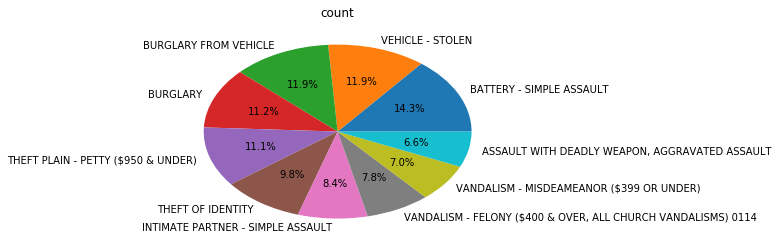

In [67]:
part3ai.pie(autopct='%1.1f%%')

#### 2) Which area is the most dangerous area in LA?

In [68]:
%%sql
SELECT DISTINCT name, count (*)
FROM location JOIN crime_facts
ON location.location_key = crime_facts.location_key
WHERE name IS NOT NULL
GROUP BY name
ORDER BY count DESC
LIMIT 10

 * postgresql://student@/project4
10 rows affected.


name,count
77th Street,110605
Southwest,102259
N Hollywood,86405
Pacific,83763
Southeast,83517
Mission,80249
Northeast,76627
Van Nuys,75456
Newton,74385
Devonshire,74013


In [69]:
%%sql
part3aii << SELECT DISTINCT name, count (*)
FROM location JOIN crime_facts
ON location.location_key = crime_facts.location_key
WHERE name IS NOT NULL
GROUP BY name
ORDER BY count DESC
LIMIT 10

 * postgresql://student@/project4
10 rows affected.
Returning data to local variable part3aii


<BarContainer object of 10 artists>

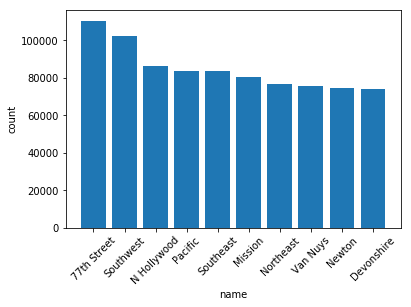

In [70]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
part3aii.bar()

In [71]:
%%sql
SELECT DISTINCT reporting_district, count (*)
FROM district JOIN crime_facts
ON district.district_key = crime_facts.district_key
WHERE reporting_district IS NOT NULL
GROUP BY reporting_district
ORDER BY count DESC
LIMIT 10

 * postgresql://student@/project4
10 rows affected.


reporting_district,count
363,8316
645,7670
2156,6694
646,6670
636,6481
1494,5852
1822,5459
1239,5299
1985,5123
1801,4914


#### 3) What time should people be more careful about possible happening crime? 

In [72]:
%%sql
SELECT distinct time_occurred,count(*)
FROM crime_facts
GROUP BY  time_occurred
ORDER BY count DESC
LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


time_occurred,count
1200,88426
1800,47046
2000,43991
1900,41995
2200,41488
1700,41479
2100,40407
800,39100
1500,37265
1600,37039


In [73]:
%%sql
part3aiii << SELECT distinct time_occurred,count(*)
FROM crime_facts
GROUP BY  time_occurred
ORDER BY count DESC
LIMIT 10;

 * postgresql://student@/project4
10 rows affected.
Returning data to local variable part3aiii


<BarContainer object of 10 artists>

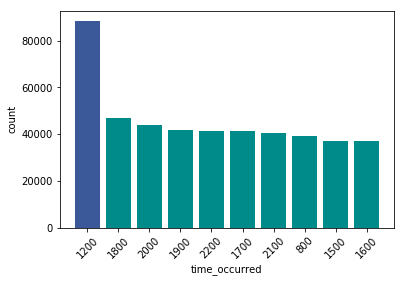

In [74]:
part3aiii.bar(color=('#3b5998','#008b8b','#008b8b','#008b8b','#008b8b','#008b8b','#008b8b','#008b8b','#008b8b','#008b8b'))

#### 4) Which age, gender and descent are more possible to be attacked?

##### age

In [75]:
%%sql
SELECT DISTINCT age, count (*)
FROM victim JOIN crime_facts
ON victim.victim_key = crime_facts.victim_key
WHERE age != '0'
GROUP BY age
ORDER BY count DESC
LIMIT 11

 * postgresql://student@/project4
11 rows affected.


age,count
15.0,38223
25.0,36939
24.0,36096
26.0,35693
23.0,35131
27.0,35097
28.0,34517
29.0,34323
30.0,33686
14.0,32816


In [76]:
%%sql
part3aivage << SELECT DISTINCT age, count (*)
FROM victim JOIN crime_facts
ON victim.victim_key = crime_facts.victim_key
WHERE age != '0'
GROUP BY age
ORDER BY count DESC
LIMIT 11

 * postgresql://student@/project4
11 rows affected.
Returning data to local variable part3aivage


<BarContainer object of 11 artists>

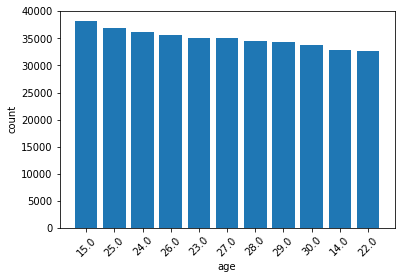

In [77]:
part3aivage.bar()

##### gender

In [78]:
%%sql
SELECT DISTINCT sex, count (*)
FROM victim JOIN crime_facts
ON victim.victim_key = crime_facts.victim_key
WHERE sex != ''
GROUP BY sex
ORDER BY count DESC
LIMIT 4

 * postgresql://student@/project4
4 rows affected.


sex,count
M,739581
F,675402
X,24080
H,53


In [79]:
%%sql
part3aivsex << SELECT DISTINCT sex, count (*)
FROM victim JOIN crime_facts
ON victim.victim_key = crime_facts.victim_key
WHERE sex != ''
GROUP BY sex
ORDER BY count DESC
LIMIT 4


 * postgresql://student@/project4
4 rows affected.
Returning data to local variable part3aivsex


<BarContainer object of 4 artists>

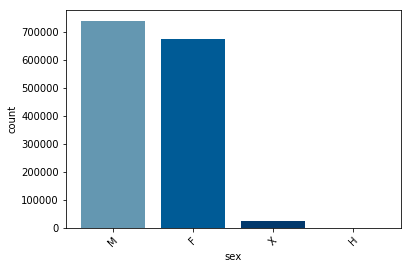

In [80]:
part3aivsex.bar(color= ("#6497b1","#005b96","#03396c","#005b96"))

##### descent

In [81]:
%%sql
SELECT DISTINCT descent, count (*)
FROM victim JOIN crime_facts
ON victim.victim_key = crime_facts.victim_key
WHERE descent != ''
GROUP BY descent
ORDER BY count DESC
LIMIT 5

 * postgresql://student@/project4
5 rows affected.


descent,count
H,549515
W,391855
B,255056
O,152776
X,41535


In [82]:
%%sql
part3adescent << SELECT DISTINCT descent, count (*)
FROM victim JOIN crime_facts
ON victim.victim_key = crime_facts.victim_key
WHERE descent != ''
GROUP BY descent
ORDER BY count DESC
LIMIT 5

 * postgresql://student@/project4
5 rows affected.
Returning data to local variable part3adescent


<BarContainer object of 5 artists>

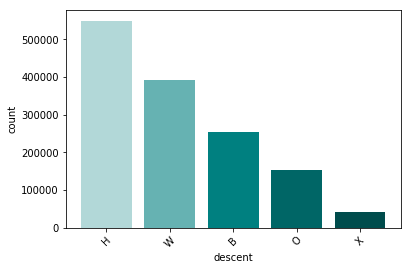

In [83]:
part3adescent.bar(color = ('#b2d8d8','#66b2b2','#008080','#006666','#004c4c'))

#### 5) Which weapons are frequnetly used?

In [84]:
%%sql
SELECT DISTINCT description, count (*)
FROM weapon JOIN crime_facts
ON weapon.weapon_key = crime_facts.weapon_key
WHERE description != ''
GROUP BY description
ORDER BY count DESC
LIMIT 5

 * postgresql://student@/project4
5 rows affected.


description,count
"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",319818
VERBAL THREAT,43814
UNKNOWN WEAPON/OTHER WEAPON,40746
HAND GUN,25352
SEMI-AUTOMATIC PISTOL,10096


In [85]:
%%sql
weapon << SELECT DISTINCT description, count (*)
FROM weapon JOIN crime_facts
ON weapon.weapon_key = crime_facts.weapon_key
WHERE description != ''
GROUP BY description
ORDER BY count DESC
LIMIT 5

 * postgresql://student@/project4
5 rows affected.
Returning data to local variable weapon


([<matplotlib.patches.Wedge at 0x7f875301f4e0>,
 [Text(-0.785474,0.907211,'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)'),
  Text(0.18541,-1.08426,'VERBAL THREAT'),
  Text(0.768397,-0.787125,'UNKNOWN WEAPON/OTHER WEAPON'),
  Text(1.04231,-0.351565,'HAND GUN'),
  Text(1.09714,-0.0792565,'SEMI-AUTOMATIC PISTOL')],
 [Text(-0.458193,0.529206,'72.7%'),
  Text(0.101133,-0.591415,'10.0%'),
  Text(0.419126,-0.429341,'9.3%'),
  Text(0.568531,-0.191763,'5.8%'),
  Text(0.598441,-0.0432308,'2.3%')])

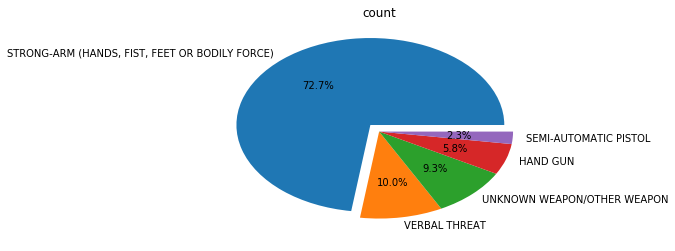

In [86]:
weapon.pie(autopct='%1.1f%%',explode=(0.1,0,0, 0, 0))

#### 6) what about the count of status?

In [87]:
%%sql
SELECT DISTINCT description, count (*)
FROM status JOIN crime_facts
ON status.status_key = crime_facts.status_key
WHERE description IS NOT NULL
GROUP BY description
ORDER BY count DESC
LIMIT 5

 * postgresql://student@/project4
5 rows affected.


description,count
Invest Cont,1227180
Adult Other,178175
Adult Arrest,162424
Juv Arrest,12619
Juv Other,3889


In [88]:
%%sql
status << SELECT DISTINCT description, count (*)
FROM status JOIN crime_facts
ON status.status_key = crime_facts.status_key
WHERE description IS NOT NULL
GROUP BY description
ORDER BY count DESC
LIMIT 5

 * postgresql://student@/project4
5 rows affected.
Returning data to local variable status


<BarContainer object of 5 artists>

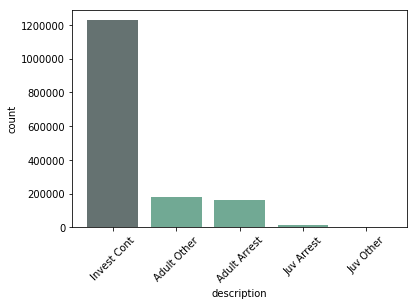

In [89]:
status.bar(color = ('#657271','#71a994','#71a994','#71a994','#71a994'))

#### 7) the timing between date_reported and date_occurred also showing some funny facts

In [90]:
%%sql

SELECT (date_reported- date_occurred) AS datedifference,count(*)
FROM crime_facts
GROUP BY datedifference
ORDER BY count DESC
LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


datedifference,count
0,724705
1,410167
2,97078
3,52594
4,32608
5,23096
6,17624
7,16470
8,11780
9,9443


In [91]:
%%sql

datediff << SELECT (date_reported- date_occurred) AS datedifference,count(*)
FROM crime_facts
GROUP BY datedifference
ORDER BY count DESC
LIMIT 10;

 * postgresql://student@/project4
10 rows affected.
Returning data to local variable datediff


<BarContainer object of 10 artists>

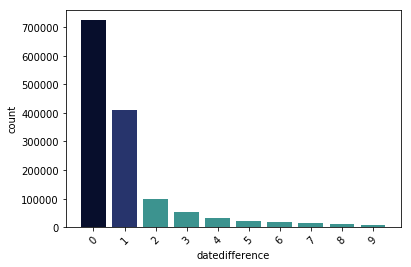

In [92]:
datediff.bar(color = ('#070e2c','#27346c','#3c938f','#3c938f','#3c938f','#3c938f','#3c938f','#3c938f','#3c938f','#3c938f'))

### PART3b - Cross Analysis

#### 1.1) what is the most frequent crimes in the top10 dangerous area?

In [93]:
%%sql
DROP TABLE IF EXISTS location_top10;

SELECT DISTINCT name, location.location_key,count (*) INTO location_top10
FROM location JOIN crime_facts
ON location.location_key = crime_facts.location_key
WHERE name IS NOT NULL
GROUP BY name,location.location_key
ORDER BY count DESC
LIMIT 10


 * postgresql://student@/project4
Done.
10 rows affected.


[]

In [94]:

%%sql
SELECT crime.description,location_top10.name into location_top10_crime
FROM crime 
JOIN crime_facts
ON crime.crime_key = crime_facts.crime_key
JOIN location
on location.location_key = crime_facts.location_key
JOIN location_top10
on location.name = location_top10.name


 * postgresql://student@/project4
847279 rows affected.


[]

In [95]:
%%sql
SELECT name, description
  FROM (SELECT name, description, ROW_NUMBER() OVER (PARTITION BY name ORDER BY freq DESC) AS rn
          FROM (  SELECT name, description, COUNT('x') AS freq
                    FROM location_top10_crime
                GROUP BY 1, 2) crime_freq) ranked_food_req
 WHERE rn = 1;

 * postgresql://student@/project4
10 rows affected.


name,description
77th Street,BATTERY - SIMPLE ASSAULT
Devonshire,BURGLARY
Mission,VEHICLE - STOLEN
Newton,VEHICLE - STOLEN
N Hollywood,BURGLARY FROM VEHICLE
Northeast,VEHICLE - STOLEN
Pacific,THEFT PLAIN - PETTY ($950 & UNDER)
Southeast,BATTERY - SIMPLE ASSAULT
Southwest,BATTERY - SIMPLE ASSAULT
Van Nuys,BURGLARY FROM VEHICLE


#### 1.2) what is the most time in the top10 dangerous area?

In [96]:

%%sql
DROP TABLE IF EXISTS location_top10_time;
SELECT time_occurred, location.name into location_top10_time
FROM crime_facts
JOIN location_top10
ON  location_top10.location_key = crime_facts.location_key
JOIN location
on location.location_key = crime_facts.location_key


 * postgresql://student@/project4
Done.
847279 rows affected.


[]

In [97]:
%%sql
SELECT name, time_occurred
  FROM (SELECT name, time_occurred, ROW_NUMBER() OVER (PARTITION BY name ORDER BY freq DESC) AS rn
          FROM (  SELECT name, time_occurred, COUNT('x') AS freq
                    FROM location_top10_time
                GROUP BY 1, 2) time_freq) ranked_food_req
 WHERE rn = 1;

 * postgresql://student@/project4
10 rows affected.


name,time_occurred
77th Street,1200
Devonshire,1200
Mission,1200
Newton,1200
N Hollywood,1200
Northeast,1200
Pacific,1200
Southeast,1200
Southwest,1200
Van Nuys,1200


#### 2.1) what kind of age are more easily being attacked in male?

In [98]:
%%sql
SELECT DISTINCT age, count(age), sex
FROM victim
JOIN crime_facts
ON victim.victim_key = crime_facts.victim_key
JOIN crime
ON crime_facts.crime_key = crime.crime_key
WHERE sex = 'M'
AND age != '0'
GROUP BY sex, age
ORDER BY count(age) DESC
LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


age,count,sex
25.0,16530,M
29.0,16357,M
26.0,16243,M
28.0,16220,M
27.0,16183,M
30.0,16103,M
24.0,15852,M
35.0,15724,M
23.0,15300,M
32.0,15254,M


In [99]:
%%sql
sexm << SELECT DISTINCT age, count(age), sex
FROM victim
JOIN crime_facts
ON victim.victim_key = crime_facts.victim_key
JOIN crime
ON crime_facts.crime_key = crime.crime_key
WHERE sex = 'M'
AND age != '0'
GROUP BY sex, age
ORDER BY count(age) DESC
LIMIT 10;

 * postgresql://student@/project4
10 rows affected.
Returning data to local variable sexm


<BarContainer object of 10 artists>

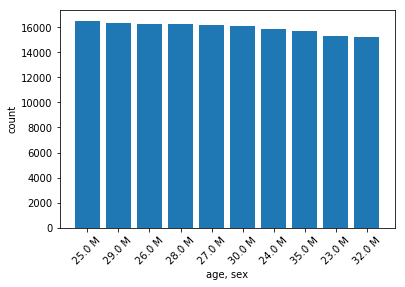

In [100]:
sexm.bar()

#### 2.1) what kind of age are more easily being attacked in female?

In [101]:
%%sql
SELECT DISTINCT age, count(age), sex
FROM victim
JOIN crime_facts
ON victim.victim_key = crime_facts.victim_key
JOIN crime
ON crime_facts.crime_key = crime.crime_key
WHERE sex = 'F'
AND age != '0'
GROUP BY sex, age
ORDER BY count(age) DESC
LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


age,count,sex
25.0,20402,F
24.0,20231,F
23.0,19823,F
26.0,19433,F
27.0,18905,F
22.0,18597,F
28.0,18288,F
29.0,17954,F
30.0,17572,F
21.0,17158,F


In [102]:
%%sql
SELECT DISTINCT age, count(age), sex
FROM victim
JOIN crime_facts
ON victim.victim_key = crime_facts.victim_key
JOIN crime
ON crime_facts.crime_key = crime.crime_key
WHERE sex = 'F'
AND age != '0'
GROUP BY sex, age
ORDER BY count(age) DESC
LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


age,count,sex
25.0,20402,F
24.0,20231,F
23.0,19823,F
26.0,19433,F
27.0,18905,F
22.0,18597,F
28.0,18288,F
29.0,17954,F
30.0,17572,F
21.0,17158,F


In [103]:
%%sql
sexf << SELECT DISTINCT age, count(age), sex
FROM victim
JOIN crime_facts
ON victim.victim_key = crime_facts.victim_key
JOIN crime
ON crime_facts.crime_key = crime.crime_key
WHERE sex = 'F'
AND age != '0'
GROUP BY sex, age
ORDER BY count(age) DESC
LIMIT 10;

 * postgresql://student@/project4
10 rows affected.
Returning data to local variable sexf


<BarContainer object of 10 artists>

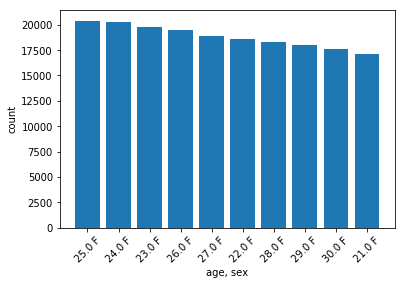

In [104]:
sexf.bar()